In [1]:
# import dependencies
import pyreadr
import rdata
import pandas as pd
import datetime
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator


Read-in csv and assess for preprocessing

In [3]:
harris_co_df = pd.read_csv("C:\\Users\\rasha\\Project2\\Resources\\houston_metro_daily_temps_2000_2020_v2.csv")
harris_co_df

,StCoFIPS,Date,Tmin_C,Tmax_C,Tmean_C,TDmin_C,TDmax_C,TDmean_C,NETmin_C,NETmax_C,...,UTCImin_C,UTCImax_C,UTCImean_C,Flag_T,Flag_TD,Flag_NET,Flag_HI,Flag_HX,Flag_WBGT,Flag_UTCI
0,48015,10958.0,18.67,25.29,21.26,16.37,18.84,17.91,10.10,17.70,...,10.21,24.58,16.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,48039,10958.0,19.16,24.30,21.17,17.82,19.36,18.67,10.98,16.80,...,11.05,24.13,16.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,48071,10958.0,18.42,23.47,20.24,17.40,19.16,18.40,10.07,16.16,...,10.36,24.46,15.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,48157,10958.0,18.85,25.20,21.38,17.16,19.22,18.34,10.65,17.62,...,10.95,24.47,16.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,48167,10958.0,18.74,23.23,20.46,17.57,19.18,18.52,9.99,15.60,...,9.52,23.62,15.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69016,48167,18626.0,18.44,22.81,19.76,15.86,19.08,17.85,9.95,15.43,...,9.89,23.85,15.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69017,48201,18626.0,17.35,23.85,19.56,15.08,19.14,17.59,10.02,17.06,...,11.55,25.48,17.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69018,48291,18626.0,17.22,22.77,19.02,14.96,19.07,17.46,10.32,16.52,...,12.76,25.13,17.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69019,48339,18626.0,15.27,23.22,18.80,13.98,18.90,17.09,8.33,17.08,...,12.03,25.59,17.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Preprocessing needed: 
- Convert date and set as index (2-steps needed)
- Drop nulls
- Drop FIPS info (only looking at 1 county)
- Rename/Reorder columns
- Celsius to Fahrenheit conversion 

In [4]:
# Function to convert days in 'posixct_date' (assumed to be days since 1970-01-01) to 'YYYYMMDD'

def posixct_date_to_yyyymmdd(posixct_date):
    epoch_start = datetime.datetime(1970, 1, 1)
    actual_date = epoch_start + datetime.timedelta(seconds=int(posixct_date * 86400))  # Convert days to seconds
    return actual_date.strftime('%Y%m%d')

# Ensure these data are floated if not, and conversion in days is intended, force cast or check type here.

harris_co_df['Date'] = harris_co_df['Date'].apply(posixct_date_to_yyyymmdd)

harris_co_df.head()

,StCoFIPS,Date,Tmin_C,Tmax_C,Tmean_C,TDmin_C,TDmax_C,TDmean_C,NETmin_C,NETmax_C,...,UTCImin_C,UTCImax_C,UTCImean_C,Flag_T,Flag_TD,Flag_NET,Flag_HI,Flag_HX,Flag_WBGT,Flag_UTCI
0,48015,20000102,18.67,25.29,21.26,16.37,18.84,17.91,10.10,17.70,...,10.21,24.58,16.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,48039,20000102,19.16,24.30,21.17,17.82,19.36,18.67,10.98,16.80,...,11.05,24.13,16.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,48071,20000102,18.42,23.47,20.24,17.40,19.16,18.40,10.07,16.16,...,10.36,24.46,15.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,48157,20000102,18.85,25.20,21.38,17.16,19.22,18.34,10.65,17.62,...,10.95,24.47,16.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,48167,20000102,18.74,23.23,20.46,17.57,19.18,18.52,9.99,15.60,...,9.52,23.62,15.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Convert integer dates to datetime format
harris_co_df['Date'] = pd.to_datetime(harris_co_df['Date'].astype(str), format='%Y%m%d')

harris_co_df

,StCoFIPS,Date,Tmin_C,Tmax_C,Tmean_C,TDmin_C,TDmax_C,TDmean_C,NETmin_C,NETmax_C,...,UTCImin_C,UTCImax_C,UTCImean_C,Flag_T,Flag_TD,Flag_NET,Flag_HI,Flag_HX,Flag_WBGT,Flag_UTCI
0,48015,2000-01-02,18.67,25.29,21.26,16.37,18.84,17.91,10.10,17.70,...,10.21,24.58,16.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,48039,2000-01-02,19.16,24.30,21.17,17.82,19.36,18.67,10.98,16.80,...,11.05,24.13,16.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,48071,2000-01-02,18.42,23.47,20.24,17.40,19.16,18.40,10.07,16.16,...,10.36,24.46,15.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,48157,2000-01-02,18.85,25.20,21.38,17.16,19.22,18.34,10.65,17.62,...,10.95,24.47,16.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,48167,2000-01-02,18.74,23.23,20.46,17.57,19.18,18.52,9.99,15.60,...,9.52,23.62,15.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69016,48167,2020-12-30,18.44,22.81,19.76,15.86,19.08,17.85,9.95,15.43,...,9.89,23.85,15.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69017,48201,2020-12-30,17.35,23.85,19.56,15.08,19.14,17.59,10.02,17.06,...,11.55,25.48,17.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69018,48291,2020-12-30,17.22,22.77,19.02,14.96,19.07,17.46,10.32,16.52,...,12.76,25.13,17.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69019,48339,2020-12-30,15.27,23.22,18.80,13.98,18.90,17.09,8.33,17.08,...,12.03,25.59,17.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
harris_co_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69021 entries, 0 to 69020
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   StCoFIPS    69021 non-null  int64         
 1   Date        69021 non-null  datetime64[ns]
 2   Tmin_C      69021 non-null  float64       
 3   Tmax_C      69021 non-null  float64       
 4   Tmean_C     69021 non-null  float64       
 5   TDmin_C     69021 non-null  float64       
 6   TDmax_C     69021 non-null  float64       
 7   TDmean_C    69021 non-null  float64       
 8   NETmin_C    69021 non-null  float64       
 9   NETmax_C    69021 non-null  float64       
 10  NETmean_C   69021 non-null  float64       
 11  HImin_C     69021 non-null  float64       
 12  HImax_C     69021 non-null  float64       
 13  HImean_C    69021 non-null  float64       
 14  HXmin_C     69021 non-null  float64       
 15  HXmax_C     69021 non-null  float64       
 16  HXmean_C    69021 non-

In [7]:
#drop columns with no data ("Flag_")

columns_to_drop = [col for col in harris_co_df.columns if (harris_co_df[col] == 0.0).all()]
harris_co_df = harris_co_df.drop(columns_to_drop, axis=1)
harris_co_df

,StCoFIPS,Date,Tmin_C,Tmax_C,Tmean_C,TDmin_C,TDmax_C,TDmean_C,NETmin_C,NETmax_C,...,HXmin_C,HXmax_C,HXmean_C,WBGTmin_C,WBGTmax_C,WBGTmean_C,UTCImin_C,UTCImax_C,UTCImean_C,Flag_UTCI
0,48015,2000-01-02,18.67,25.29,21.26,16.37,18.84,17.91,10.10,17.70,...,24.23,30.33,27.09,17.97,22.87,19.96,10.21,24.58,16.25,0.0
1,48039,2000-01-02,19.16,24.30,21.17,17.82,19.36,18.67,10.98,16.80,...,25.00,30.33,27.55,18.41,23.13,20.43,11.05,24.13,16.63,0.0
2,48071,2000-01-02,18.42,23.47,20.24,17.40,19.16,18.40,10.07,16.16,...,23.90,30.03,26.43,17.77,23.41,19.86,10.36,24.46,15.82,0.0
3,48157,2000-01-02,18.85,25.20,21.38,17.16,19.22,18.34,10.65,17.62,...,24.50,30.60,27.53,18.12,23.01,20.28,10.95,24.47,16.86,0.0
4,48167,2000-01-02,18.74,23.23,20.46,17.57,19.18,18.52,9.99,15.60,...,24.32,29.60,26.73,18.02,22.99,20.02,9.52,23.62,15.30,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69016,48167,2020-12-30,18.44,22.81,19.76,15.86,19.08,17.85,9.95,15.43,...,23.51,29.48,25.55,17.41,23.28,19.34,9.89,23.85,15.31,0.0
69017,48201,2020-12-30,17.35,23.85,19.56,15.08,19.14,17.59,10.02,17.06,...,22.28,30.17,25.17,16.62,23.71,19.03,11.55,25.48,17.12,0.0
69018,48291,2020-12-30,17.22,22.77,19.02,14.96,19.07,17.46,10.32,16.52,...,21.41,29.17,24.55,16.12,22.92,18.64,12.76,25.13,17.75,0.0
69019,48339,2020-12-30,15.27,23.22,18.80,13.98,18.90,17.09,8.33,17.08,...,19.21,29.17,24.08,14.76,23.01,18.33,12.03,25.59,17.66,0.0


In [8]:

# Drop columns

harris_co_df = harris_co_df.drop(['StCoFIPS', 'Flag_UTCI'], axis=1)

#set "Date" as index

harris_co_df.set_index("Date", inplace=True)

harris_co_df.head()



,Tmin_C,Tmax_C,Tmean_C,TDmin_C,TDmax_C,TDmean_C,NETmin_C,NETmax_C,NETmean_C,HImin_C,...,HImean_C,HXmin_C,HXmax_C,HXmean_C,WBGTmin_C,WBGTmax_C,WBGTmean_C,UTCImin_C,UTCImax_C,UTCImean_C
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-02,18.67,25.29,21.26,16.37,18.84,17.91,10.10,17.70,13.44,19.03,...,21.59,24.23,30.33,27.09,17.97,22.87,19.96,10.21,24.58,16.25
2000-01-02,19.16,24.30,21.17,17.82,19.36,18.67,10.98,16.80,13.50,19.55,...,21.59,25.00,30.33,27.55,18.41,23.13,20.43,11.05,24.13,16.63
2000-01-02,18.42,23.47,20.24,17.40,19.16,18.40,10.07,16.16,12.46,18.78,...,20.66,23.90,30.03,26.43,17.77,23.41,19.86,10.36,24.46,15.82
2000-01-02,18.85,25.20,21.38,17.16,19.22,18.34,10.65,17.62,13.80,19.21,...,21.76,24.50,30.60,27.53,18.12,23.01,20.28,10.95,24.47,16.86
2000-01-02,18.74,23.23,20.46,17.57,19.18,18.52,9.99,15.60,12.34,19.09,...,20.89,24.32,29.60,26.73,18.02,22.99,20.02,9.52,23.62,15.30


In [9]:
# Rename columns

harris_co_renamed = harris_co_df.rename(columns={
                                                'Tmin_C':'Min Ambient Temp',
                                                'Tmax_C':'Max Ambient Temp',
                                                'Tmean_C':'Mean Ambient Temp',
                                                'TDmin_C':'Min Dew Point',
                                                'TDmax_C':'Max Dew point',
                                                'TDmean_C':'Mean Dew Point',
                                                'NETmin_C':'Min Net Effective Temp',
                                                'NETmax_C':'Max Net Effective Temp',
                                                'NETmean_C':'Mean Net Effective Temp',
                                                'HImin_C':'Min Heat Index',             
                                                'HImax_C':'Max Heat Index',             
                                                'HImean_C':'Mean Heat Index',           
                                                'HXmin_C':'Min Humidex',             
                                                'HXmax_C':'Max Humidex',             
                                                'HXmean_C':'Mean Humidex',           
                                                'WBGTmin_C':'Min WBGT',           
                                                'WBGTmax_C':'Max WBGT',          
                                                'WBGTmean_C':'Mean WBGT',           
                                                'UTCImin_C':'Min UTCI',       
                                                'UTCImax_C':'Max UTCI',          
                                                'UTCImean_C':'Mean UTCI',})
harris_co_renamed

,Min Ambient Temp,Max Ambient Temp,Mean Ambient Temp,Min Dew Point,Max Dew point,Mean Dew Point,Min Net Effective Temp,Max Net Effective Temp,Mean Net Effective Temp,Min Heat Index,...,Mean Heat Index,Min Humidex,Max Humidex,Mean Humidex,Min WBGT,Max WBGT,Mean WBGT,Min UTCI,Max UTCI,Mean UTCI
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-02,18.67,25.29,21.26,16.37,18.84,17.91,10.10,17.70,13.44,19.03,...,21.59,24.23,30.33,27.09,17.97,22.87,19.96,10.21,24.58,16.25
2000-01-02,19.16,24.30,21.17,17.82,19.36,18.67,10.98,16.80,13.50,19.55,...,21.59,25.00,30.33,27.55,18.41,23.13,20.43,11.05,24.13,16.63
2000-01-02,18.42,23.47,20.24,17.40,19.16,18.40,10.07,16.16,12.46,18.78,...,20.66,23.90,30.03,26.43,17.77,23.41,19.86,10.36,24.46,15.82
2000-01-02,18.85,25.20,21.38,17.16,19.22,18.34,10.65,17.62,13.80,19.21,...,21.76,24.50,30.60,27.53,18.12,23.01,20.28,10.95,24.47,16.86
2000-01-02,18.74,23.23,20.46,17.57,19.18,18.52,9.99,15.60,12.34,19.09,...,20.89,24.32,29.60,26.73,18.02,22.99,20.02,9.52,23.62,15.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30,18.44,22.81,19.76,15.86,19.08,17.85,9.95,15.43,11.88,18.80,...,20.11,23.51,29.48,25.55,17.41,23.28,19.34,9.89,23.85,15.31
2020-12-30,17.35,23.85,19.56,15.08,19.14,17.59,10.02,17.06,12.67,17.69,...,19.88,22.28,30.17,25.17,16.62,23.71,19.03,11.55,25.48,17.12
2020-12-30,17.22,22.77,19.02,14.96,19.07,17.46,10.32,16.52,12.67,17.44,...,19.35,21.41,29.17,24.55,16.12,22.92,18.64,12.76,25.13,17.75


In [10]:
#Convert Data from Celsius to Fahrenheit

# Define conversion functions
def celsius_to_fahrenheit(celsius):
    return celsius * 9/5 + 32

# Apply conversion
harris_co_renamed = harris_co_renamed.map(celsius_to_fahrenheit)
harris_co_renamed

,Min Ambient Temp,Max Ambient Temp,Mean Ambient Temp,Min Dew Point,Max Dew point,Mean Dew Point,Min Net Effective Temp,Max Net Effective Temp,Mean Net Effective Temp,Min Heat Index,...,Mean Heat Index,Min Humidex,Max Humidex,Mean Humidex,Min WBGT,Max WBGT,Mean WBGT,Min UTCI,Max UTCI,Mean UTCI
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-02,65.606,77.522,70.268,61.466,65.912,64.238,50.180,63.860,56.192,66.254,...,70.862,75.614,86.594,80.762,64.346,73.166,67.928,50.378,76.244,61.250
2000-01-02,66.488,75.740,70.106,64.076,66.848,65.606,51.764,62.240,56.300,67.190,...,70.862,77.000,86.594,81.590,65.138,73.634,68.774,51.890,75.434,61.934
2000-01-02,65.156,74.246,68.432,63.320,66.488,65.120,50.126,61.088,54.428,65.804,...,69.188,75.020,86.054,79.574,63.986,74.138,67.748,50.648,76.028,60.476
2000-01-02,65.930,77.360,70.484,62.888,66.596,65.012,51.170,63.716,56.840,66.578,...,71.168,76.100,87.080,81.554,64.616,73.418,68.504,51.710,76.046,62.348
2000-01-02,65.732,73.814,68.828,63.626,66.524,65.336,49.982,60.080,54.212,66.362,...,69.602,75.776,85.280,80.114,64.436,73.382,68.036,49.136,74.516,59.540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30,65.192,73.058,67.568,60.548,66.344,64.130,49.910,59.774,53.384,65.840,...,68.198,74.318,85.064,77.990,63.338,73.904,66.812,49.802,74.930,59.558
2020-12-30,63.230,74.930,67.208,59.144,66.452,63.662,50.036,62.708,54.806,63.842,...,67.784,72.104,86.306,77.306,61.916,74.678,66.254,52.790,77.864,62.816
2020-12-30,62.996,72.986,66.236,58.928,66.326,63.428,50.576,61.736,54.806,63.392,...,66.830,70.538,84.506,76.190,61.016,73.256,65.552,54.968,77.234,63.950


In [11]:
harris_co_renamed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69021 entries, 2000-01-02 to 2020-12-30
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Min Ambient Temp         69021 non-null  float64
 1   Max Ambient Temp         69021 non-null  float64
 2   Mean Ambient Temp        69021 non-null  float64
 3   Min Dew Point            69021 non-null  float64
 4   Max Dew point            69021 non-null  float64
 5   Mean Dew Point           69021 non-null  float64
 6   Min Net Effective Temp   69021 non-null  float64
 7   Max Net Effective Temp   69021 non-null  float64
 8   Mean Net Effective Temp  69021 non-null  float64
 9   Min Heat Index           69021 non-null  float64
 10  Max Heat Index           69021 non-null  float64
 11  Mean Heat Index          69021 non-null  float64
 12  Min Humidex              69021 non-null  float64
 13  Max Humidex              69021 non-null  float64
 14  Mean 

WBGT safe limit for Zone 3 is 86.1- how many times has it been exceeded overall?

In [12]:
# Count over 20 years

wbgt_threshold = 86.1

# Count values above threshold in 'max wbgt'
count_above_wbgt_threshold = (harris_co_renamed['Max WBGT'] > wbgt_threshold).sum()

# Output the result
print(f"Number of entries above {wbgt_threshold}: {count_above_wbgt_threshold}")

Number of entries above 86.1: 16065


In [13]:

# Count by year

harris_co_renamed.index = pd.to_datetime(harris_co_renamed.index)

wbgt_threshold = 86.1

# Group by year in the index and count values above threshold in 'Max WBGT'
count_above_wbgt_threshold_by_year = harris_co_renamed.groupby(harris_co_renamed.index.year).apply(
    lambda x: (x['Max WBGT'] > wbgt_threshold).sum()
)

wbgt_days_exceeded = pd.DataFrame(count_above_wbgt_threshold_by_year)
wbgt_days_exceeded

,0
Date,
2000,732
2001,676
2002,608
2003,735
2004,672
2005,862
2006,708
2007,725
2008,655


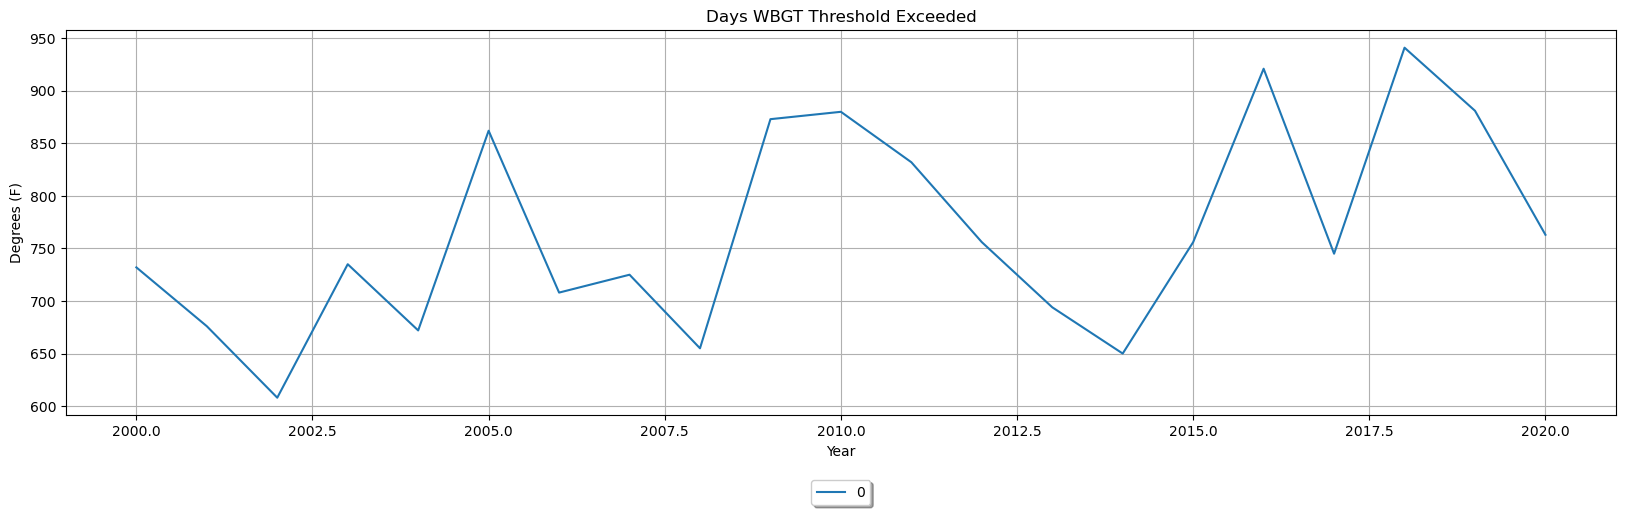

In [14]:
wbgt_days_exceeded.plot(figsize=(20,5))

# Display the plot
plt.title('Days WBGT Threshold Exceeded')
plt.xlabel('Year')
plt.ylabel('Degrees (F)')
plt.grid()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=7)
plt.show()

Heat Index Danger Threshold is 105. How many times has it been exceeded?

In [15]:
# Count over 20 years

hi_threshold = 105

# Count values above threshold in 'max wbgt'
count_above_hi_threshold = (harris_co_renamed['Max Heat Index'] > hi_threshold).sum()

# Output the result
print(f"Number of entries above {hi_threshold}: {count_above_hi_threshold}")

Number of entries above 105: 832


In [16]:
# Count by year

harris_co_renamed.index = pd.to_datetime(harris_co_renamed.index)

hi_threshold = 105

# Group by year in the index and count values above threshold in 'Max WBGT'
count_above_hi_threshold_by_year = harris_co_renamed.groupby(harris_co_renamed.index.year).apply(
    lambda x: (x['Max Heat Index'] > hi_threshold).sum()
)

hi_days_exceeded = pd.DataFrame(count_above_hi_threshold_by_year)


In [17]:
hi_renamed=hi_days_exceeded.rename(columns={"0":"Heat Index Exceeded"})
hi_renamed

,0
Date,
2000,47
2001,0
2002,1
2003,17
2004,15
2005,37
2006,9
2007,21
2008,17


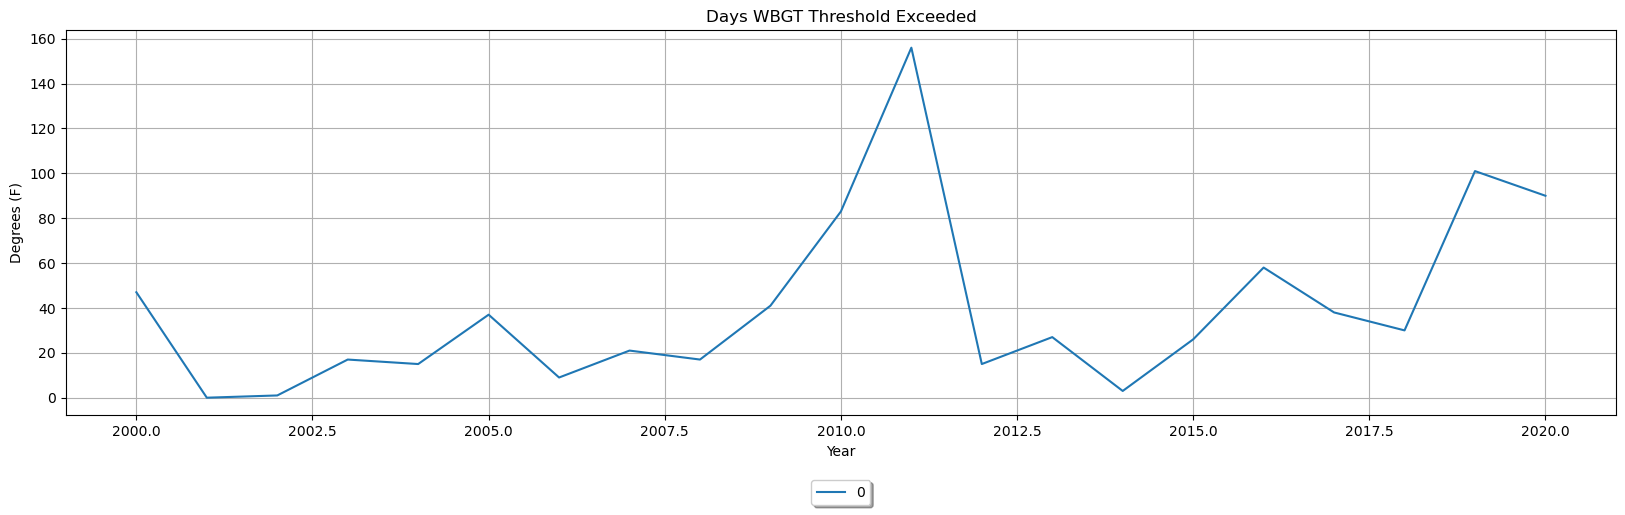

In [18]:
hi_days_exceeded.plot(figsize=(20,5))

# Display the plot
plt.title('Days WBGT Threshold Exceeded')
plt.xlabel('Year')
plt.ylabel('Degrees (F)')
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=7)
plt.show()

In [19]:
exceeded_merged_df = pd.merge(wbgt_days_exceeded,hi_days_exceeded, on='Date')
df_merged = exceeded_merged_df.rename(columns={'0_x':'WBGT', '0_y':'HI'})
df_merged

,WBGT,HI
Date,,
2000,732,47
2001,676,0
2002,608,1
2003,735,17
2004,672,15
2005,862,37
2006,708,9
2007,725,21
2008,655,17


Comparison plot - WBGT and HI

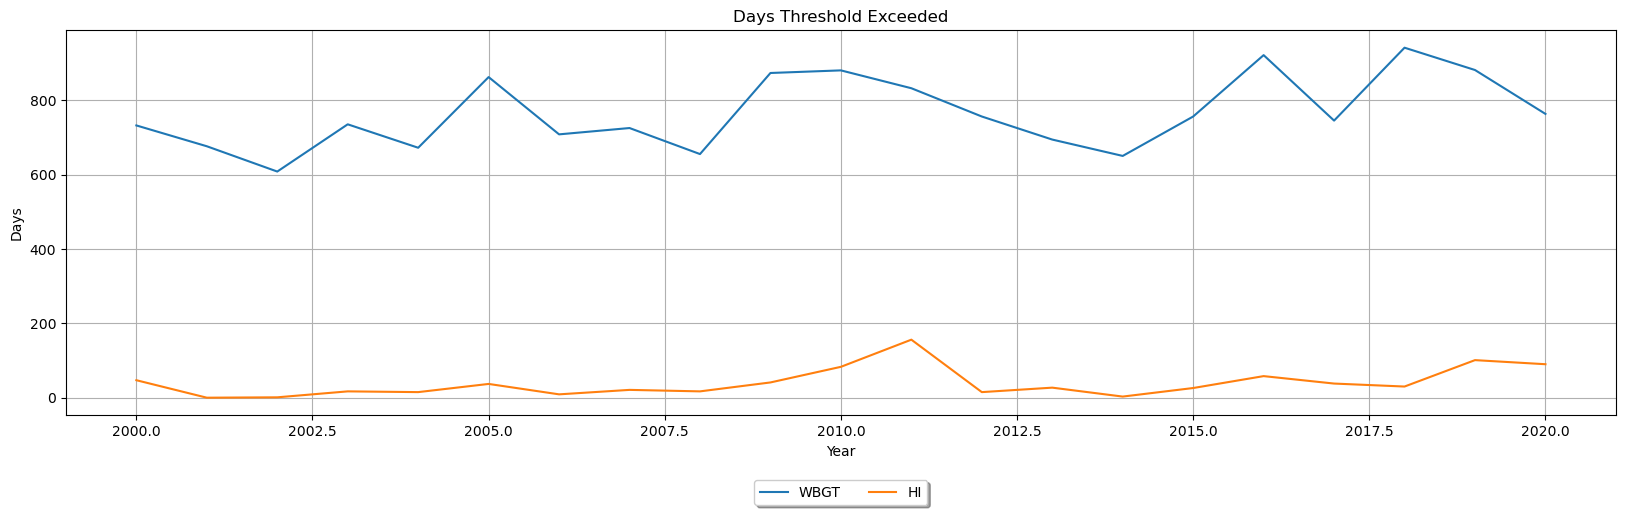

In [20]:
df_merged.plot(figsize=(20,5))

# Display the plot
plt.title('Days Threshold Exceeded')
plt.xlabel('Year')
plt.ylabel('Days')
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=7)
plt.show()

Check how weekly, monthly and yearly means visualize the data

In [21]:

# Resample the data to weekly mean

harris_co_weekly_mean = harris_co_renamed.resample('W').mean()
harris_co_weekly_mean.head(40)

,Min Ambient Temp,Max Ambient Temp,Mean Ambient Temp,Min Dew Point,Max Dew point,Mean Dew Point,Min Net Effective Temp,Max Net Effective Temp,Mean Net Effective Temp,Min Heat Index,...,Mean Heat Index,Min Humidex,Max Humidex,Mean Humidex,Min WBGT,Max WBGT,Mean WBGT,Min UTCI,Max UTCI,Mean UTCI
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-02,65.436000,76.164000,69.642000,62.880000,66.410000,64.892000,50.698000,62.836000,56.034000,66.080000,...,70.332000,75.438000,86.448000,80.610000,64.228000,73.616000,68.076000,51.690000,76.152000,62.054000
2000-01-09,48.879429,63.673429,56.488286,36.017143,52.701143,45.776286,33.393714,49.812000,42.168286,47.335429,...,55.376000,47.550857,66.949714,58.270000,44.669429,61.556571,53.666857,32.334571,65.286000,48.240000
2000-01-16,55.312000,71.981429,62.874000,40.342000,57.803429,51.447429,41.136286,59.284571,49.960571,53.819714,...,62.156857,55.678857,76.665714,67.078000,50.302857,69.296000,59.844000,40.708571,77.018000,57.313714
2000-01-23,56.767429,72.208000,63.602000,47.799714,60.622286,53.525143,42.796857,59.394286,50.666857,55.755429,...,63.070571,59.472857,78.146000,68.421429,53.282857,69.096571,60.824000,43.376000,76.309429,58.210571
2000-01-30,39.697429,54.249143,46.570286,27.826857,39.295143,33.026857,20.881143,40.036286,30.127143,38.207714,...,44.451714,35.792857,52.019143,43.176000,36.249429,53.535714,43.532857,20.792857,59.270286,36.275429
2000-02-06,42.773714,59.503429,50.499714,32.903714,43.793714,38.131429,26.299143,46.932857,36.052857,40.962286,...,48.462286,39.641429,57.751143,48.511714,39.171714,58.306286,47.631714,28.036000,65.423714,43.778286
2000-02-13,55.790286,72.341429,62.881429,51.693143,60.595714,56.772286,42.385429,60.846571,50.742000,55.433143,...,62.742571,60.019714,78.516000,68.984286,54.005714,70.738286,61.441429,46.096857,78.367429,59.708571
2000-02-20,58.849714,74.225429,65.476000,51.747429,60.760000,55.909429,45.506286,62.940000,53.474000,58.310286,...,65.224000,63.548286,80.839143,71.774286,56.043143,72.669143,63.230000,48.688000,81.038571,62.446571
2000-02-27,57.820857,74.334857,65.458000,49.278286,60.417714,55.127429,44.196571,60.902857,52.070571,57.117429,...,65.094000,61.703714,80.503429,71.088286,54.820571,71.115143,62.493429,44.988286,76.482857,58.890571


Exploratory Visualizations to identify any patterns to drill into

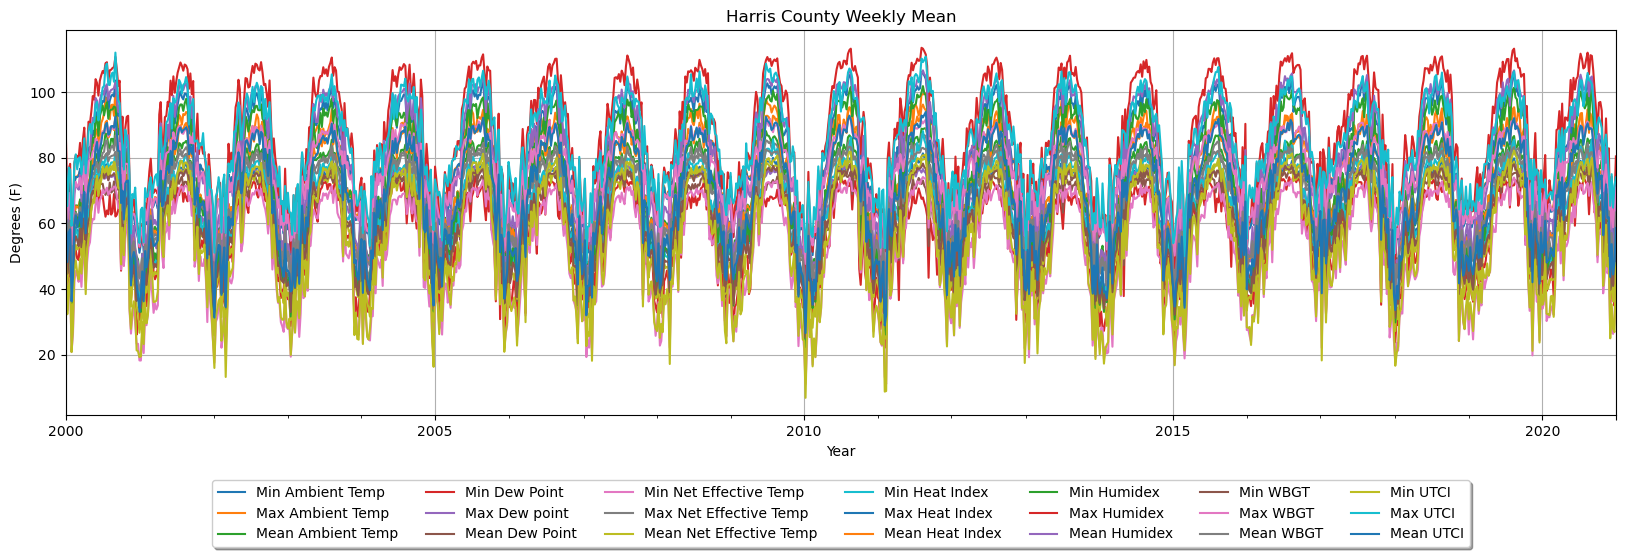

In [22]:
#Sample Visualization - Weekly Mean


harris_co_weekly_mean.plot(figsize=(20,5))

# Display the plot
plt.title('Harris County Weekly Mean')
plt.xlabel('Year')  # Set x-axis label, since the index name is not usually displayed
plt.ylabel('Degrees (F)')
plt.grid()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=7)
plt.show()

In [24]:

# Resample the data to monthly mean
harris_co_monthly_mean = harris_co_renamed.resample('ME').mean()
harris_co_monthly_mean.head(12)

,Min Ambient Temp,Max Ambient Temp,Mean Ambient Temp,Min Dew Point,Max Dew point,Mean Dew Point,Min Net Effective Temp,Max Net Effective Temp,Mean Net Effective Temp,Min Heat Index,...,Mean Heat Index,Min Humidex,Max Humidex,Mean Humidex,Min WBGT,Max WBGT,Mean WBGT,Min UTCI,Max UTCI,Mean UTCI
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,50.413733,65.518867,57.474400,38.569133,52.611533,46.179467,34.832600,52.095400,43.321333,49.055800,...,56.368267,50.106133,68.502733,59.459800,46.457400,63.393200,54.580333,34.724800,69.348267,50.103200
2000-02-29,54.269931,70.962966,61.778414,47.203241,57.270414,52.327103,40.050138,58.741379,48.812138,53.481586,...,61.163655,56.938414,75.579310,66.118345,51.550966,68.916138,59.412138,42.292414,75.989655,56.877172
2000-03-31,59.190452,74.825484,66.359613,53.796129,63.329355,58.190129,45.981032,63.397677,54.389355,58.924258,...,66.391097,64.850258,82.674129,73.685871,57.024065,73.244903,64.495097,48.631742,80.109613,63.425097
2000-04-30,61.086467,77.647133,69.064200,53.935867,63.616533,58.643533,49.228533,66.388000,57.673867,60.879667,...,69.147667,66.956000,85.810400,76.574667,58.304267,75.518667,66.559733,51.547533,83.679667,67.145667
2000-05-31,72.073097,84.573871,77.642000,67.479161,72.541097,70.115742,62.635355,74.526387,68.180452,73.382452,...,80.220774,87.155097,99.138452,92.934387,70.656839,82.852839,75.932968,68.068000,91.980452,78.894839
2000-06-30,74.943333,88.225267,80.857533,68.021867,73.840800,71.239667,66.958533,77.884267,71.843667,76.576867,...,84.242667,92.027200,103.025733,97.096533,73.256667,85.007333,78.211133,73.097067,95.844333,83.237400
2000-07-31,76.651806,95.118000,85.307032,64.079806,73.984710,69.622839,69.717548,83.019161,75.889871,78.702194,...,88.799161,94.410387,106.754323,100.251613,74.493355,88.282774,80.270452,76.038065,104.643806,88.605484
2000-08-31,76.480129,95.120194,85.019677,65.286839,74.553226,70.729742,70.453290,83.243677,76.357290,78.432903,...,88.940323,94.900710,107.475097,100.923484,74.729290,89.446129,80.693677,77.441677,105.090645,89.429677
2000-09-30,71.835067,90.004333,80.077533,60.320200,68.812933,64.427067,62.508600,78.308533,69.997200,73.097200,...,82.461933,83.949533,101.038400,91.909067,68.191133,83.690467,74.868733,67.435200,98.594467,81.077000


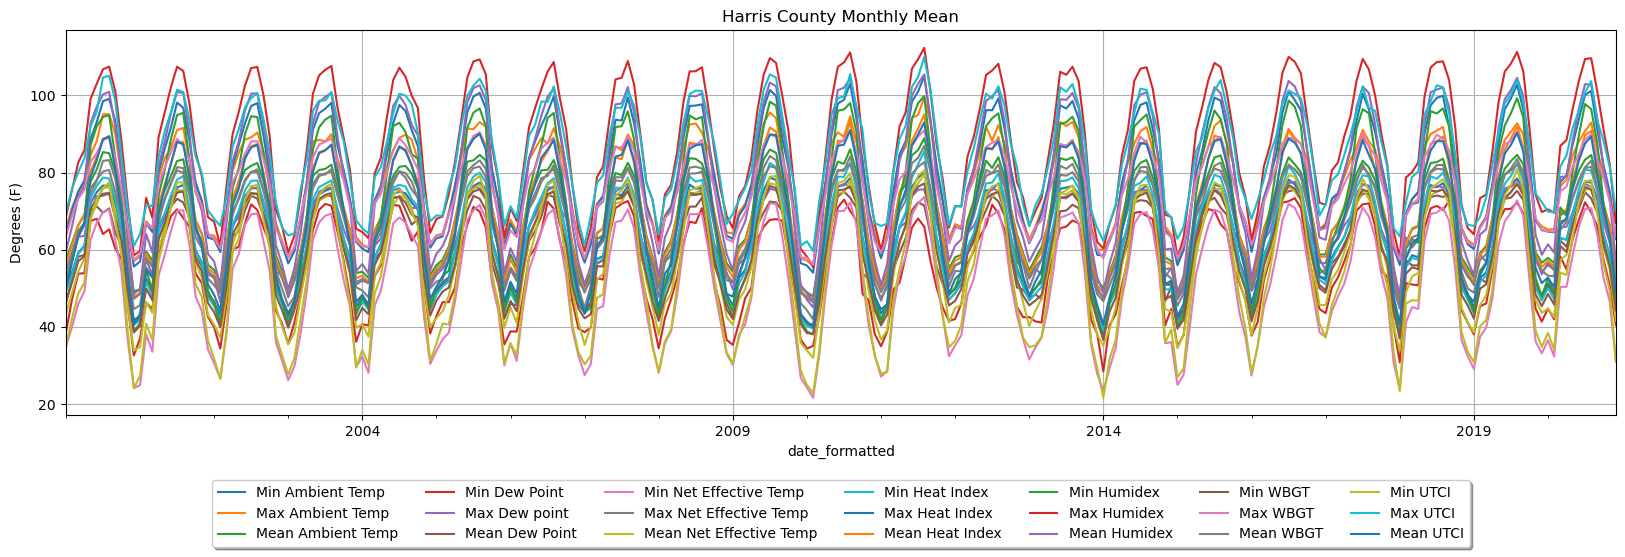

In [25]:
#Sample Visualization - Monthly Mean

harris_co_monthly_mean.plot(figsize=(20,5))

# Display the plot
plt.title('Harris County Monthly Mean')
plt.xlabel('date_formatted')  # Set x-axis label, since the index name is not usually displayed
plt.ylabel('Degrees (F)')
plt.grid()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=7)
plt.show()

In [27]:

# Resample the data to yearly mean

harris_co_yearly_mean = harris_co_renamed.resample('YE').mean()
harris_co_yearly_mean.head(21)

,Min Ambient Temp,Max Ambient Temp,Mean Ambient Temp,Min Dew Point,Max Dew point,Mean Dew Point,Min Net Effective Temp,Max Net Effective Temp,Mean Net Effective Temp,Min Heat Index,...,Mean Heat Index,Min Humidex,Max Humidex,Mean Humidex,Min WBGT,Max WBGT,Mean WBGT,Min UTCI,Max UTCI,Mean UTCI
Date,,,,,,,,,,,,,,,,,,,,,
2000-12-31,63.032164,78.754877,70.272444,54.623638,64.233847,59.598767,51.554740,67.137556,58.943118,63.320679,...,71.338751,71.586384,87.485874,79.332384,60.481436,75.793989,67.318844,55.193162,85.165249,68.623458
2001-12-31,61.577386,76.619342,68.574334,56.034093,64.011967,60.056614,50.141266,65.791803,57.673721,61.851890,...,69.706773,69.871036,86.111677,77.867014,59.559775,75.371995,66.601868,54.572800,84.023249,67.683381
2002-12-31,61.689364,76.791638,68.679014,55.324329,63.872334,59.692586,50.022378,65.673732,57.512268,61.929556,...,69.831468,69.977951,86.271205,77.988203,59.464110,75.005556,66.456888,53.877896,83.413649,67.066449
2003-12-31,61.376455,76.531984,68.415321,55.588093,63.945216,59.861282,49.967742,65.826367,57.628723,61.562778,...,69.612301,69.453578,86.273737,77.788427,59.168882,75.507408,66.492208,53.956093,84.149945,67.489775
2004-12-31,62.469781,76.799344,69.116945,56.769115,64.650071,60.730765,51.136803,66.015596,58.310044,62.783705,...,70.400372,71.071787,86.830257,78.858186,60.304683,75.579437,67.121617,55.457792,83.751372,68.118137
2005-12-31,62.498805,78.462493,69.957918,54.489129,63.458252,59.086186,51.371463,67.151978,59.044334,62.683079,...,71.242685,70.683797,87.012088,78.845693,59.894488,75.921967,67.099693,55.314975,85.761907,68.990663
2006-12-31,62.822701,78.626893,70.184663,54.866701,64.753216,59.811419,51.664395,67.542778,59.323896,62.974981,...,71.307364,71.055852,88.114444,79.517041,60.208323,76.336811,67.522811,55.228619,85.551677,68.887184
2007-12-31,62.001260,76.545660,68.732575,56.367425,64.662115,60.554630,50.897989,66.047781,58.179036,62.320707,...,70.079090,70.603447,86.831611,78.623704,59.909474,75.741600,66.963874,55.262718,84.039923,68.164460
2008-12-31,62.099120,78.482623,69.810705,53.304262,63.765355,58.782443,50.434727,67.009541,58.525858,62.186186,...,70.823158,69.776842,87.081557,78.526383,59.302437,75.589268,66.829590,53.546508,84.845546,67.807887


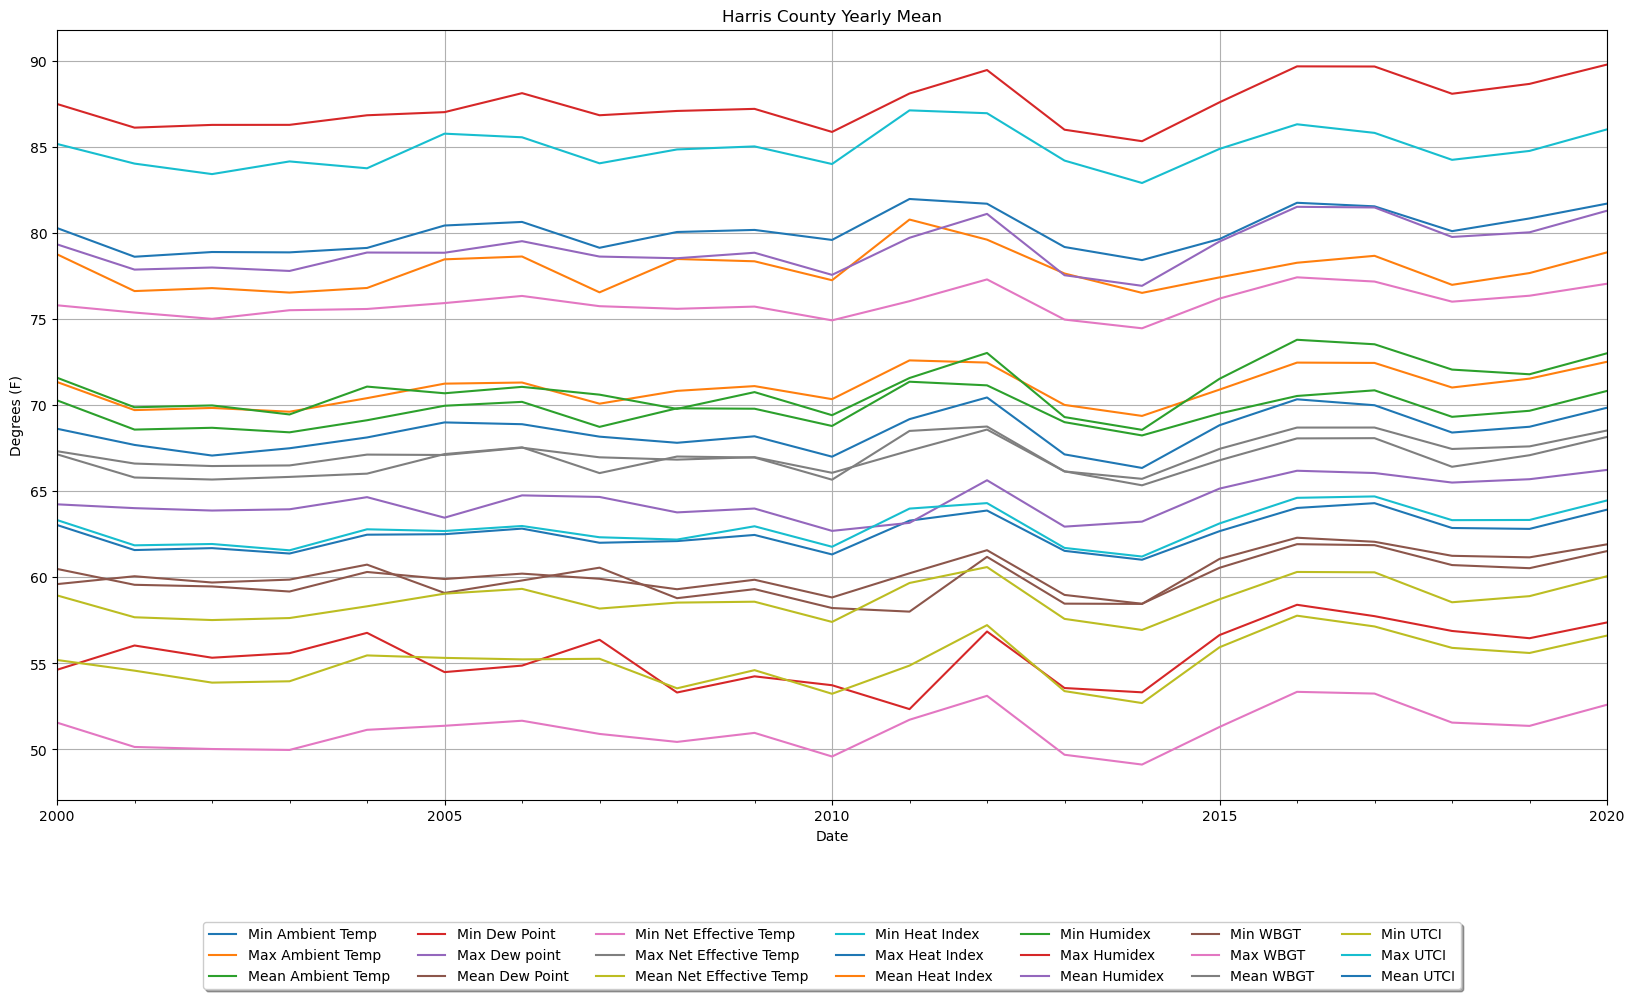

In [28]:
#Sample Visualization - Yearly Mean


harris_co_yearly_mean.plot(figsize=(20,10))

# Display the plot
plt.title('Harris County Yearly Mean')
plt.grid()
plt.ylabel('Degrees (F)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=7)
plt.show()

Explore Diurnal Temperature Ranges (DTR) over time 

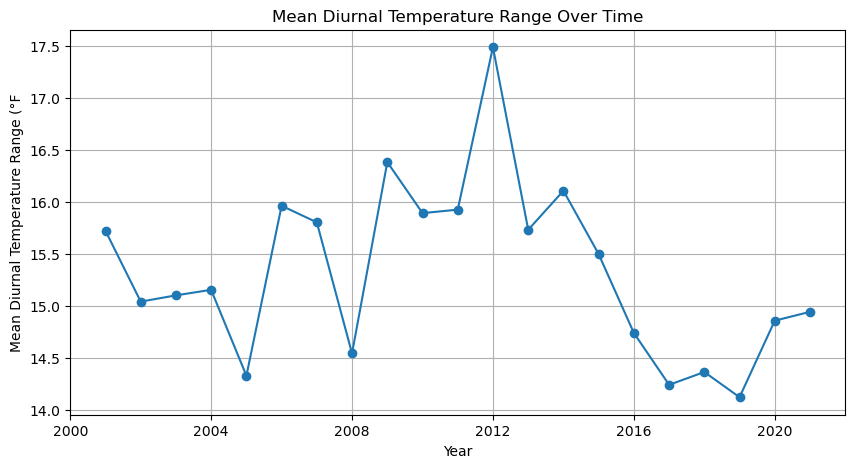

In [29]:


harris_co_yearly_mean['DTR'] = harris_co_yearly_mean['Max Ambient Temp'] - harris_co_yearly_mean['Min Ambient Temp']  # Calculate Daily Temperature Range
annual_dtr = harris_co_yearly_mean.groupby('Date')['DTR'].mean()  # Average DTR per year

# Plotting the trend
plt.figure(figsize=(10, 5))
plt.plot(annual_dtr.index, annual_dtr.values, marker='o')
plt.title("Mean Diurnal Temperature Range Over Time")
plt.xlabel("Year")
plt.ylabel("Mean Diurnal Temperature Range (°F")
plt.grid(True)
plt.show()
